In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas
import trackintel as ti
pfs = ti.io.file.read_positionfixes_csv('pfs.csv', index_col='ID')
sp = ti.io.file.read_staypoints_csv('staypoints.csv', index_col='id')

In [2]:
# Generate locations from the staypoints.
new_sp, locs = ti.preprocessing.staypoints.generate_locations(staypoints=sp, method='dbscan', epsilon=100, num_samples=3, agg_level='user')

/usr/local/lib/python3.9/site-packages/trackintel/geogr/distances.py:227: UserWarning: The CRS of your data is not defined.
  warnings.warn("The CRS of your data is not defined.")
/usr/local/lib/python3.9/site-packages/pygeos/io.py:89: UserWarning: The shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the PyGEOS GEOS version (3.10.4-CAPI-1.16.2). Conversions between both will be slow
  warnings.warn(


In [3]:
activity_sp = ti.analysis.location_identification.location_identifier (staypoints= new_sp, pre_filter=True, method='FREQ')

In [4]:
home_sp = activity_sp.loc[activity_sp['purpose'] == 'home']

In [5]:
home_sp

,user_id,started_at,finished_at,geom,location_id,purpose
id,,,,,,
795,102,2022-09-12 04:11:54-04:00,2022-09-12 04:14:27-04:00,POINT (-81.63611 30.28839),53,home
798,102,2022-09-12 04:31:43-04:00,2022-09-12 04:35:54-04:00,POINT (-81.63612 30.28838),53,home
799,102,2022-09-12 04:37:04-04:00,2022-09-12 04:41:24-04:00,POINT (-81.63610 30.28840),53,home
800,102,2022-09-12 13:51:40-04:00,2022-09-12 14:00:51-04:00,POINT (-81.63610 30.28840),53,home
802,102,2022-09-13 10:28:46-04:00,2022-09-13 10:35:11-04:00,POINT (-81.63611 30.28839),53,home
...,...,...,...,...,...,...
109900,10714,2022-10-29 07:20:16-04:00,2022-10-29 07:26:23-04:00,POINT (-81.75290 30.27120),6921,home
109902,10714,2022-10-29 07:28:23-04:00,2022-10-29 07:31:51-04:00,POINT (-81.75290 30.27120),6921,home
109903,10714,2022-10-29 07:36:00-04:00,2022-10-29 07:38:05-04:00,POINT (-81.75290 30.27120),6921,home


In [6]:
ti.io.file.write_staypoints_csv(home_sp, 'home.csv')

In [7]:
import pandas as pd
df = pd.DataFrame()

merge_sp_home = ti.preprocessing.staypoints.merge_staypoints(staypoints=home_sp, triplegs=df,  max_time_gap='30d', agg ={'geom':'first'})
merge_sp_home

,user_id,started_at,finished_at,location_id,geom
id,,,,,
795,102,2022-09-12 04:11:54-04:00,2022-09-15 00:02:14-04:00,53,POINT (-81.63611 30.28839)
1296,133,2022-09-05 14:09:02-04:00,2022-09-13 19:41:44-04:00,90,POINT (-81.63062 30.42366)
2225,144,2022-09-05 02:24:44-04:00,2022-10-30 23:35:01-04:00,178,POINT (-81.75950 30.22300)
3845,155,2022-09-15 14:16:24-04:00,2022-10-14 13:43:38-04:00,212,POINT (-81.68800 30.35620)
3964,163,2022-09-13 11:27:22-04:00,2022-10-11 19:39:43-04:00,230,POINT (-81.68800 30.35620)
...,...,...,...,...,...
100177,7238,2022-09-13 14:18:55-04:00,2022-10-15 00:46:30-04:00,6099,POINT (-81.68800 30.35620)
100536,7252,2022-09-21 22:31:39-04:00,2022-10-27 03:11:06-04:00,6125,POINT (-81.75290 30.27120)
103782,8359,2022-09-21 01:22:06-04:00,2022-10-29 12:41:23-04:00,6396,POINT (-81.82170 30.28510)


In [8]:
# Find the user_id with the most occurrences and Visualization.
top_id = pfs['user_id'].value_counts().idxmax()
pfs_top = pfs.loc[pfs['user_id'] == top_id]
sp_top = home_sp.loc[home_sp['user_id'] == top_id]

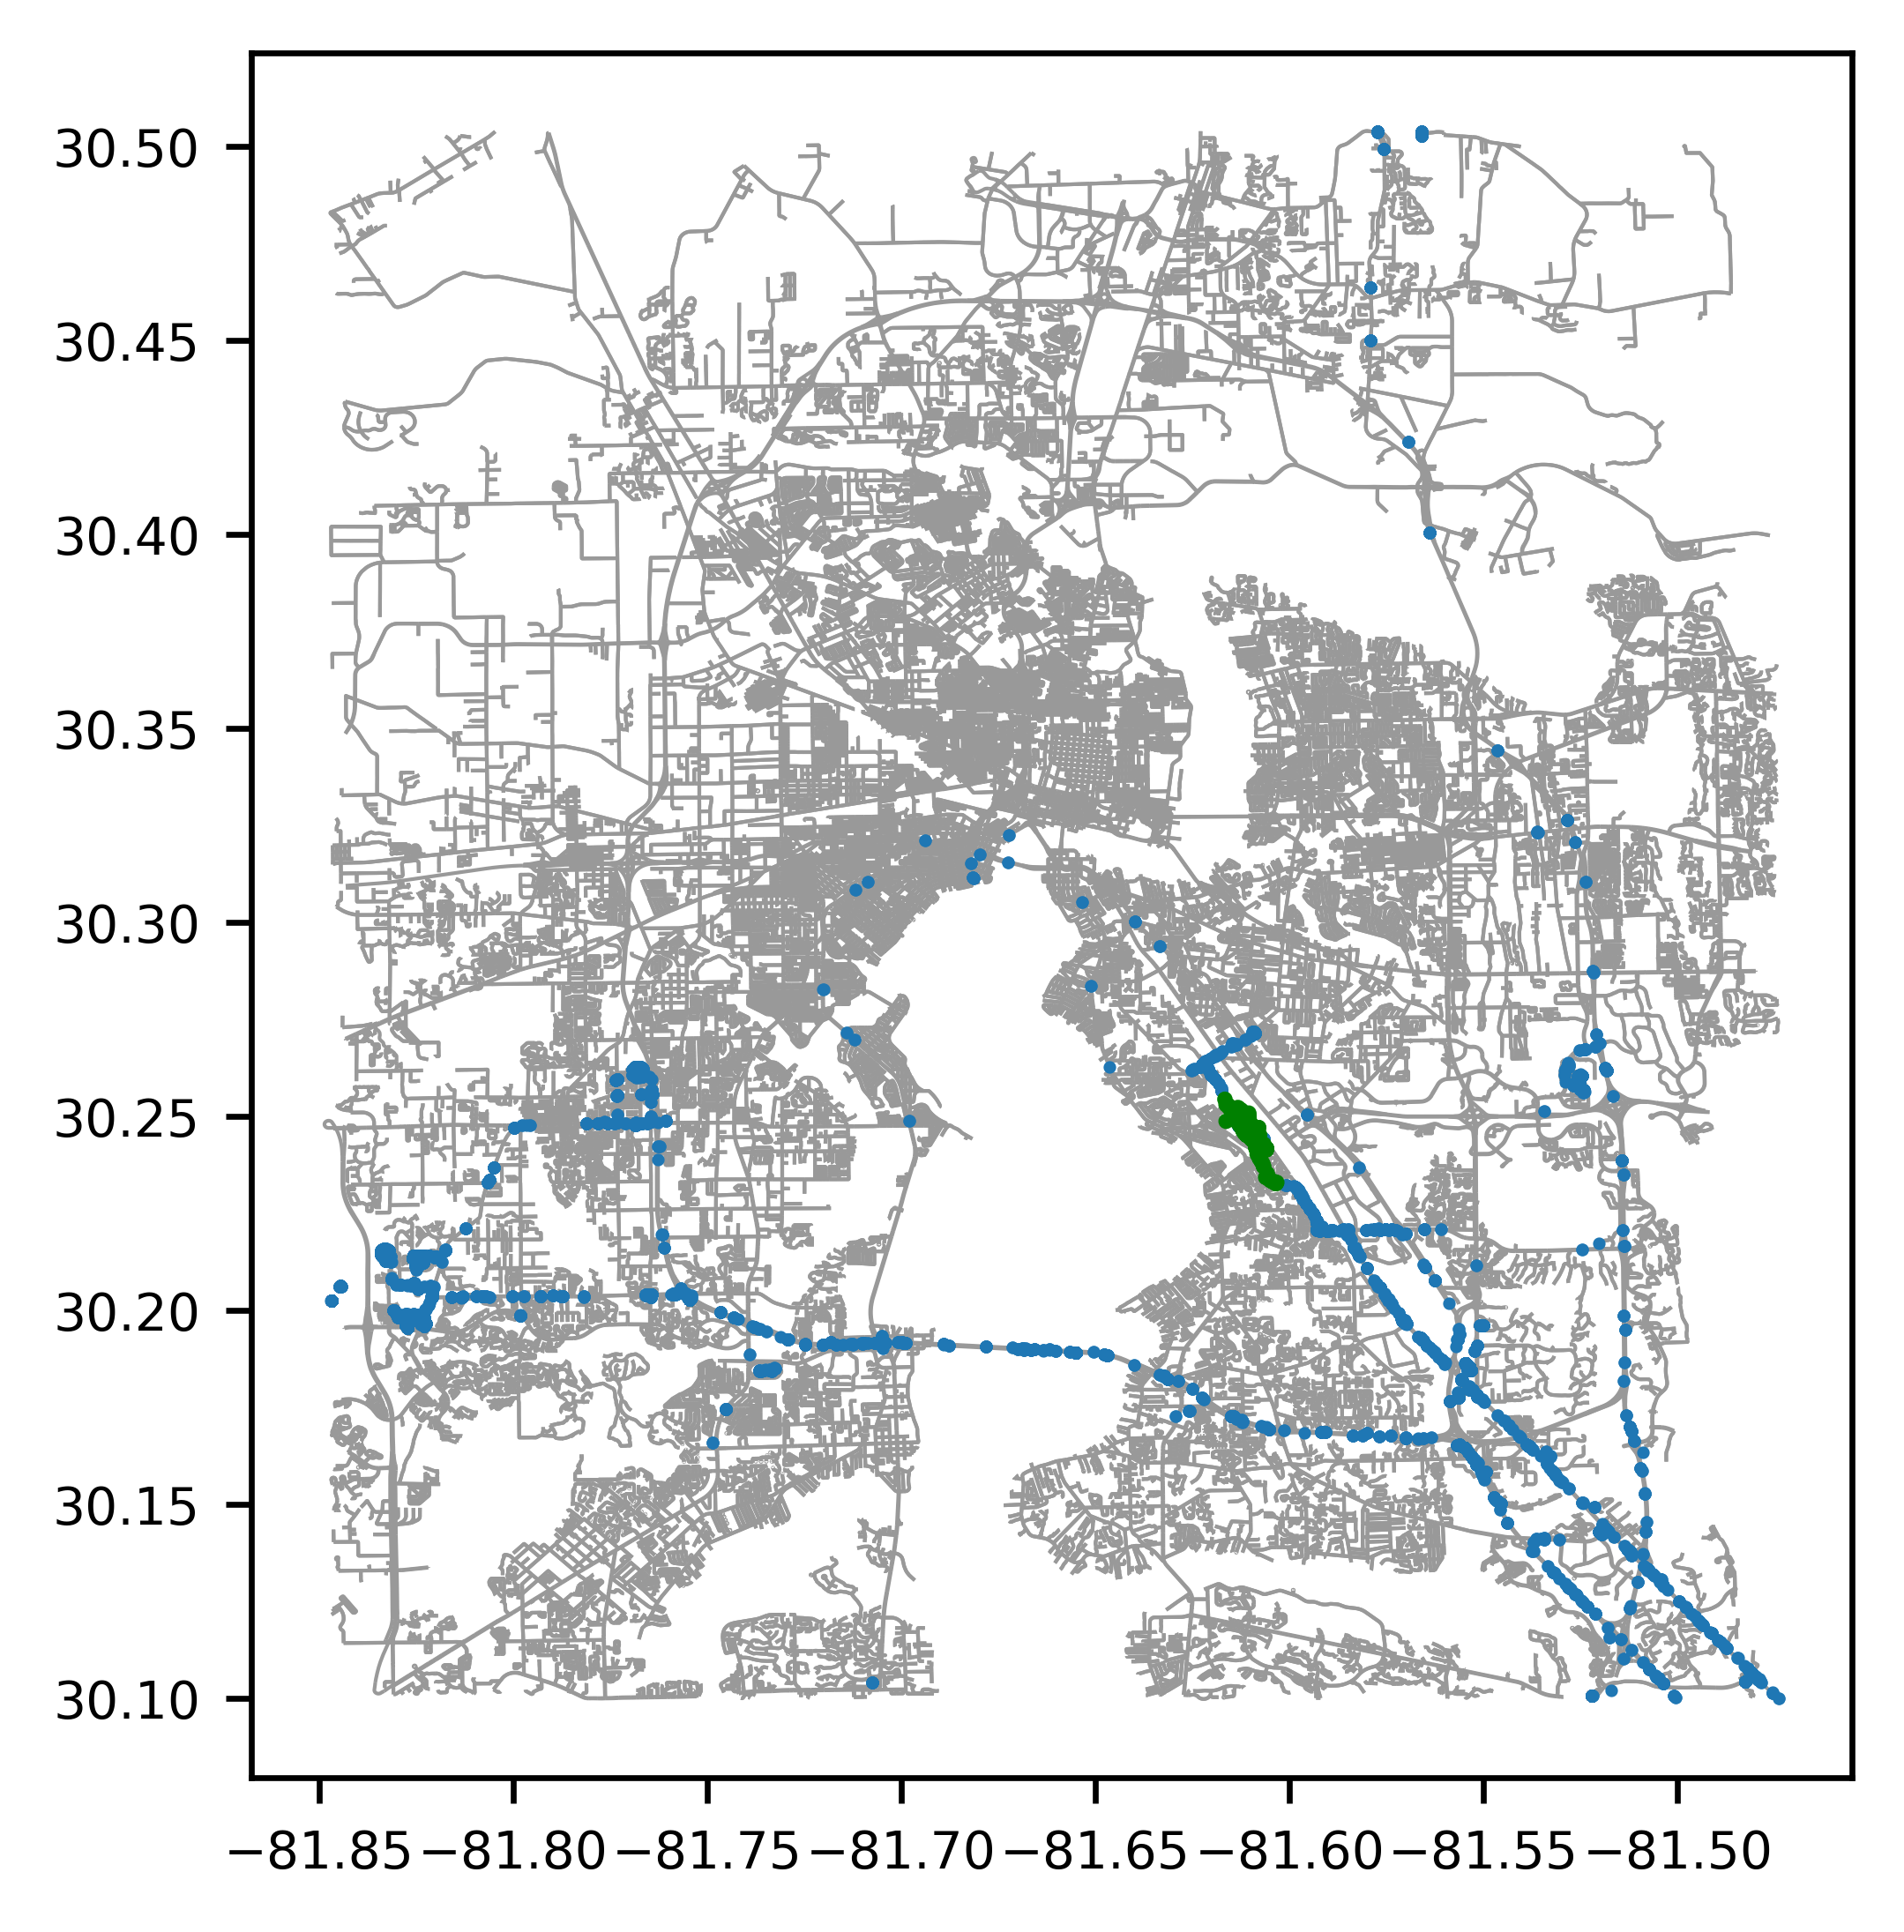

In [9]:
sp_top.as_staypoints.plot(radius=100, positionfixes=pfs_top, plot_osm=True)